In [1]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

#                               !!!INPUT FILES NEED TO BE CSV FORMAT!!!
#           As usual make sure to format any timestamps in the input files as number,
#           or else this script will read all timestamps as '#.###E+12'

#                                   Changes/input needed to run this script:
#                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#   1. file path for the csv with all timestamps, probably fracBRAIN stage download (sfg.csv).
#   2. file path for the csv with list of timestamps you want to match, i.e. field csv (field.csv)
#   3. file path for the output csv that will be the two files above, merged via vlookup (output.csv)
#   4. make sure both input files have the same header name for timestamp column. Best to use 'timestamp'
#      as the header name.
#   5. select if you want to add an epoch timestamp column to field csv - add_timestamp = "y"
#   6. select if you want to delete the unit row (extra row below headers) - delete_unit_row = "y"
#   7. select a time_offset, if needed, to shift the field csv by x amount of seconds.
#   8. (OPTIONAL) save the file you just added to timestamps to. saves to a new file, does not overwrite.

#   


# file paths for the input and output csv~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# step (1)
path = 'C:\\Users\\rivil\\Downloads'
file_name_sfg = 'Bagpipe State 22 G 86H 8.csv' 
full_path_sfg = os.path.join(path,file_name_sfg)
# step (2)
file_name_field = 'Copy of Occidental Petroleum Corporation_G 86H_Interval_8_DataListing.xlsx'
full_path_field = os.path.join(path,file_name_field)
# step (3)
file_name_sfg_output = file_name_sfg.split(".")[0]+'_out.'+file_name_sfg.split(".")[-1]
full_path_output = os.path.join(path,file_name_sfg_output)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# create dataFrames from files ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# if one file does not have any headers for some reason, remove header=0
df_sfg = pd.read_csv(full_path_sfg, header=0, index_col=None)
df_sfg = df_sfg.iloc[:,:-2]

df_field = pd.read_excel(full_path_field,sheet_name=0,header=0,index_col=False,keep_default_na=True)
#df_field = pd.read_csv(full_path_field, header=0, index_col=None)
df_field = df_field[1:]

# transform objt into floating types
for column in df_field.columns[6:]:
    df_field[column] = df_field[column].map(lambda x: float(x))
df_field.dtypes

print(df_sfg.shape)
print(df_field.shape)

(12108, 98)
(9635, 25)


In [2]:
 # Function to subtract subsequent rows and add empty rows
def subtract_and_add_empty_rows(df, column_name):
    input_min = df.timestamp.min()
    input_max = df.timestamp.max()
    temp_list = []
    counts=0

    for i in range(len(df) - 1):
        temp_list.append(df.at[i, column_name])
        
        diff = int(abs(df.at[i, column_name] - df.at[i + 1, column_name])/1000)
        
        
        if(diff>1.0): 
            for j in range(abs(diff) - 1):
                counts+=1
                temp_list.append(np.nan)  # Adding as many empty rows as the difference

    # Adding the last value from the original DataFrame
    temp_list.append(df.at[len(df) - 1, column_name])

    temp_df = pd.DataFrame({column_name: temp_list})
    temp_df.reset_index(drop=True, inplace=True)
    
   
    temp_merged_df = temp_df.merge(df, how='left', left_on='timestamp', right_on=['timestamp'])
    #result_df.fillna()
    temp_min = temp_merged_df.timestamp.min()
    temp_max = temp_merged_df.timestamp.max()    
    
    print("input data dimensions:", df.shape)
    print("timestamp input values min, max",input_min,input_max)
    print("output data dimensions:", temp_merged_df.shape)
    print("timestamp output values min, max",temp_min,temp_max)
    print("Added emtpy rows:", counts)
    
    return temp_merged_df


In [5]:
# Apply the function
df_sfg_emtpyrows = subtract_and_add_empty_rows(df_sfg, 'timestamp')


input data dimensions: (12108, 98)
timestamp input values min, max 1706674744000 1706687006000
output data dimensions: (12263, 98)
timestamp output values min, max 1706674744000.0 1706687006000.0
Added emtpy rows: 155


In [6]:
df_sfg_emtpyrows[df_sfg_emtpyrows.isna().all(axis=1)]

,timestamp,Time,MRL_Const,Well_Name,Stage,P1,P2,P3,P4,P5,...,PC3_PPS_CH2_Bat,PC3_PPS_CH3_Bat,PC4_Date,PC4_Time,PC4_PPS_CH1,PC4_Perry State_51_6_1H,PC4_PPS_CH3,PC4_Perry State_51_6_1H_Bat,PC4_Perry State_51_6_1H_Bat.1,PC4_PPS_CH3_Bat
2594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


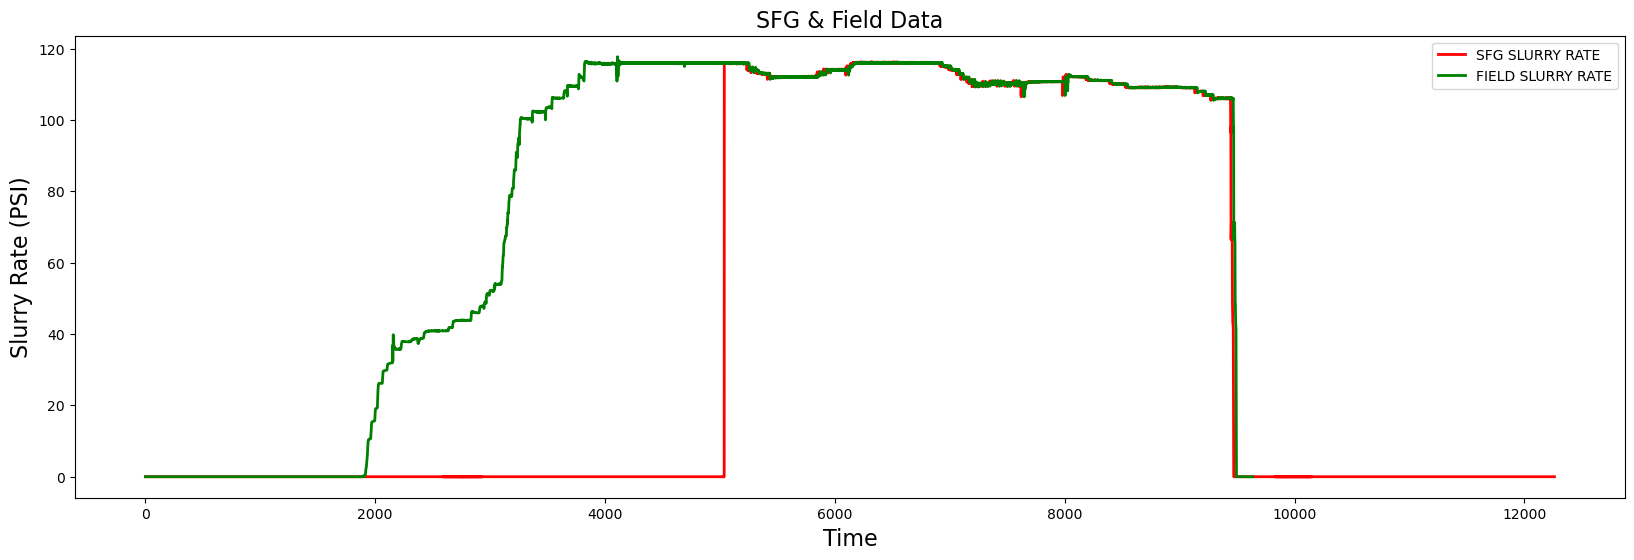

In [7]:
# Plotting Close Value Data
plt.figure(figsize=(20,6))
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(df_sfg_emtpyrows.index.values, df_sfg_emtpyrows['Slurry Rate'].values, lw=2, color='red',label="SFG SLURRY RATE")
plt.plot(df_field.index.values, df_field['SlurryRate'].values, lw=2, color='green',label="FIELD SLURRY RATE")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Slurry Rate (PSI)", fontsize=16)
plt.title("SFG & Field Data", fontsize=16);
plt.legend()

plt.show()

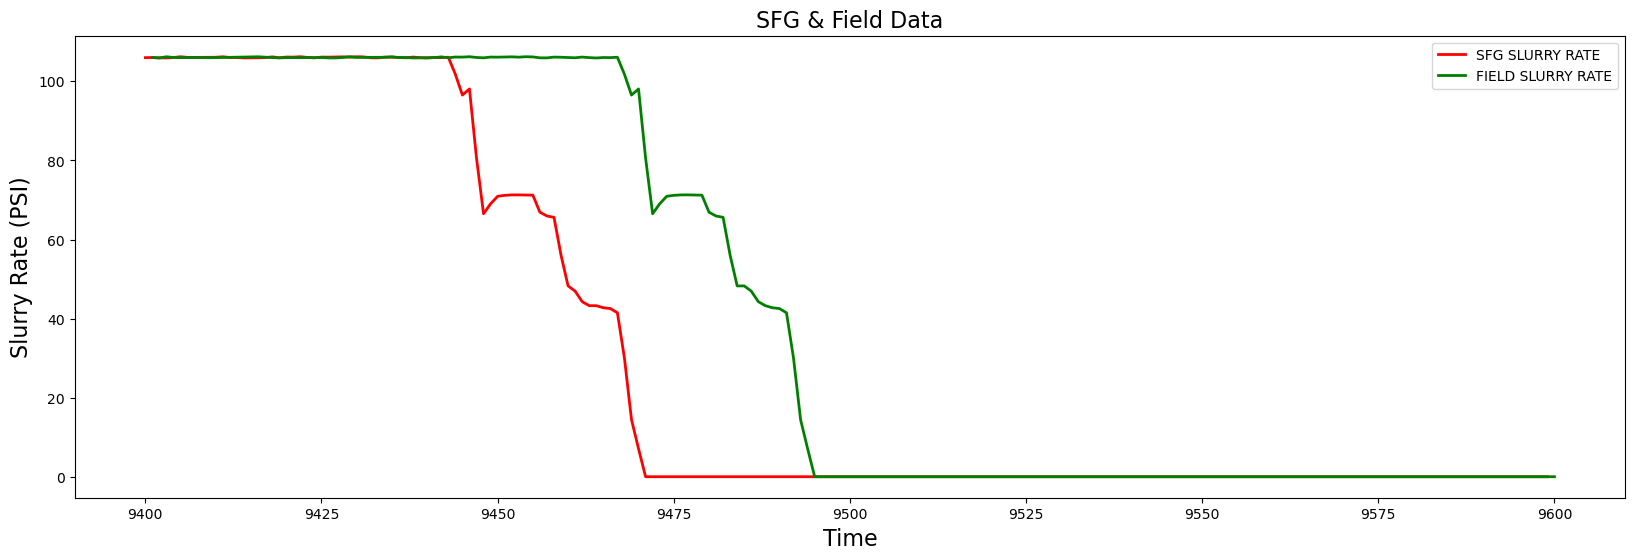

In [18]:
# Plotting Close Value Data ZOOM
start_date = 9400
end_date = 9600
plt.figure(figsize=(20,6))
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(df_sfg_emtpyrows[start_date:end_date].index.values, df_sfg_emtpyrows['Slurry Rate'][start_date:end_date].values, lw=2, color='red',label="SFG SLURRY RATE")
plt.plot(df_field[start_date:end_date].index.values, df_field['SlurryRate'][start_date:end_date].values, lw=2, color='green',label="FIELD SLURRY RATE")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Slurry Rate (PSI)", fontsize=16)
plt.title("SFG & Field Data", fontsize=16);
plt.legend()

plt.show()

In [17]:
start_date = 9400
end_date = 9600
df_sfg_emtpyrows[start_date:end_date].shape, df_field[start_date:end_date].shape

((200, 98), (200, 25))

In [70]:
# convertion to series

start_date = 9400
end_date = 9600

sfg_s = df_sfg_emtpyrows['Slurry Rate'][start_date:end_date].interpolate().values.tolist()
print(type(sfg_s))
print(np.count_nonzero(np.isnan(sfg_s)))


field_s = df_field['SlurryRate'][start_date:end_date].interpolate().values.tolist()
print(type(field_s))
print(np.count_nonzero(np.isnan(field_s)))


<class 'list'>
0
<class 'list'>
0


In [74]:
def apply_shift(series, shift):
    #print('before shift:',series)
    shifted_series = series[shift:] + series[:shift]
    #print('after_shift:',shifted_series)
    return shifted_series

def find_best_shift(series1, series2):
    min_diff = float('inf')
    best_shift = None
    
    # Iterate over possible shift values
    for shift in range(len(series1)):
        # Calculate sum of squared differences for this shift
        diff_sum = sum((series1[i] - series2[(i + shift) % len(series2)]) ** 2 for i in range(len(series1)))
        print(shift,diff_sum)
        
        # Update best shift if this shift has lower sum of squared differences
        if diff_sum < min_diff:
            min_diff = diff_sum
            best_shift = shift
    
    return best_shift

# Example usage:
series1 = [0,0,5,0,1, 2, 3, 4, 5,0,0,0]
series2 = [10,0, 1, 2, 3,4,5 ,0,0,0,0,0]
#best_shift = find_best_shift(sfg_s, field_s)
best_shift = find_best_shift(series1, series2)
print(best_shift)
#shifted_series2 = apply_shift(field_s, best_shift)
shifted_series2 = apply_shift(series2, best_shift)

print("Best shift value:", best_shift)
print("Shifted series2:", shifted_series2)


0 173
1 187
2 195
3 195
4 85
5 155
6 165
7 167
8 163
9 155
10 25
11 155
10
Best shift value: 10
Shifted series2: [0, 0, 10, 0, 1, 2, 3, 4, 5, 0, 0, 0]


In [75]:
# cross correlation

from scipy import signal

def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c

ccf_ielts = ccf_values(sfg_s, field_s)
ccf_ielts

array([-7.33062632e-03, -1.46644630e-02, -2.19892380e-02, -2.93129722e-02,
       -3.66479871e-02, -4.40014495e-02, -5.13377210e-02, -5.86753376e-02,
       -6.60146919e-02, -7.33544094e-02, -8.06947848e-02, -8.80473439e-02,
       -9.53807192e-02, -1.02715008e-01, -1.10038143e-01, -1.17363487e-01,
       -1.24691345e-01, -1.32022443e-01, -1.39372371e-01, -1.46700562e-01,
       -1.54046327e-01, -1.61390306e-01, -1.68744132e-01, -1.76079775e-01,
       -1.83406337e-01, -1.90751149e-01, -1.98094539e-01, -2.05442641e-01,
       -2.12793354e-01, -2.20136753e-01, -2.27490235e-01, -2.34839388e-01,
       -2.42166018e-01, -2.49491215e-01, -2.56835312e-01, -2.64176610e-01,
       -2.71512224e-01, -2.78839649e-01, -2.86184580e-01, -2.93515589e-01,
       -3.00838411e-01, -3.08172876e-01, -3.15504680e-01, -3.22845792e-01,
       -3.29764308e-01, -3.36166323e-01, -3.42720532e-01, -3.47559806e-01,
       -3.51014533e-01, -3.54716764e-01, -3.58604895e-01, -3.62516382e-01,
       -3.66439013e-01, -

In [76]:
# list of of our lag values
lags = signal.correlation_lags(len(sfg_s),len(field_s))
lags

array([-199, -198, -197, -196, -195, -194, -193, -192, -191, -190, -189,
       -188, -187, -186, -185, -184, -183, -182, -181, -180, -179, -178,
       -177, -176, -175, -174, -173, -172, -171, -170, -169, -168, -167,
       -166, -165, -164, -163, -162, -161, -160, -159, -158, -157, -156,
       -155, -154, -153, -152, -151, -150, -149, -148, -147, -146, -145,
       -144, -143, -142, -141, -140, -139, -138, -137, -136, -135, -134,
       -133, -132, -131, -130, -129, -128, -127, -126, -125, -124, -123,
       -122, -121, -120, -119, -118, -117, -116, -115, -114, -113, -112,
       -111, -110, -109, -108, -107, -106, -105, -104, -103, -102, -101,
       -100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
        -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
        -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
        -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
        -56,  -55,  -54,  -53,  -52,  -51,  -50,  -

In [77]:
len(lags),len(ccf_ielts)

(399, 399)

max correlation is at lag -10


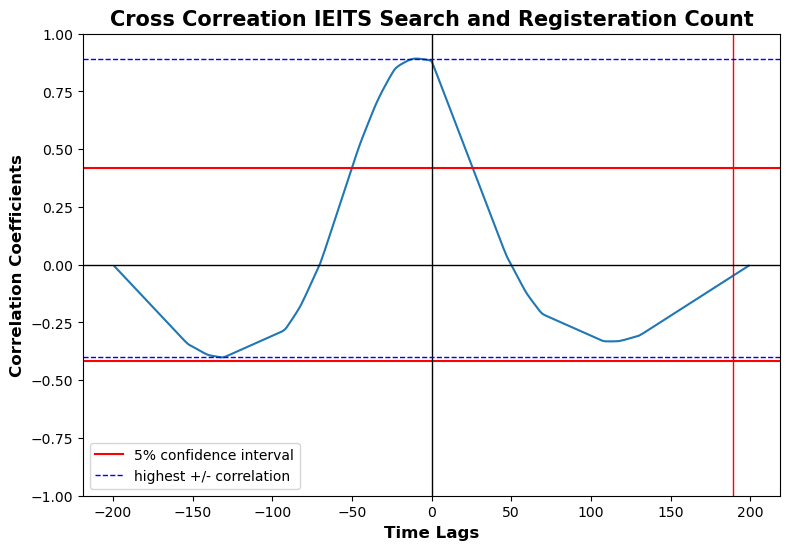

In [80]:
def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = np.argmax(ccf_ielts), color = 'red', lw = 1)
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation IElTS Search and Registeration Count', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
#ccf_plot(lags[1620:1670], ccf_ielts[1620:1670])
ccf_plot(lags, ccf_ielts)

maxlag = lags[np.argmax(ccf_ielts)]
print("max correlation is at lag %d" % maxlag)

In [86]:
data['Series1'].values

AttributeError: 'list' object has no attribute 'values'

max correlation is at lag -10


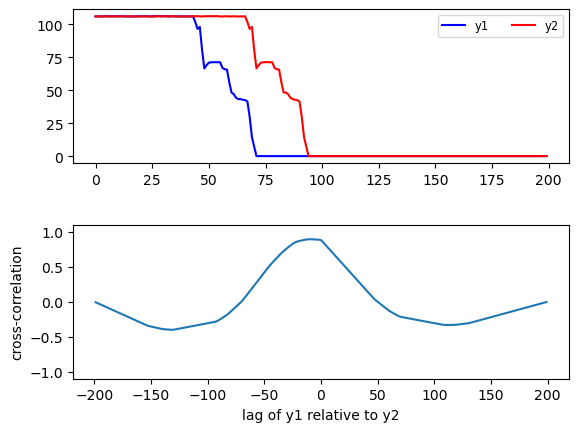

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {'Series1': sfg_s,
        'Series2': field_s}

# df_series1 = pd.DataFrame(data['Series1'])
# df_series2 = pd.DataFrame(data['Series2'])

# Create DataFrame
# df = pd.concat([df_series1,df_series2], ignore_index=True, axis=1)
npts = len(data['Series1'])
#plt.plot(df_series1.index.values,df_series1.values.flatten(), 'b', label='y1')
#print(df_series1.index.values, type(df_series1.values.flatten()))


lags = np.arange(-npts + 1, npts)
ccov = np.correlate(data['Series1'] - np.mean(data['Series1']), data['Series2'] - np.mean(data['Series2']), mode='full')
ccor = ccov / (npts * np.std(data['Series1']) * np.std(data['Series2']))

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(data['Series1'], 'b', label='y1')
ax.plot(data['Series2'], 'r', label='y2')
#ax.set_ylim(-10, 10)
ax.legend(loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(lags, ccor)
ax.set_ylim(-1.1, 1.1)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)

In [ ]:
data = {'Series1': sfg_s,
        'Series2': field_s}

In [90]:
def find_best_shift(series1, series2):
    min_diff = float('inf')
    best_shift = None
    
    # Iterate over possible shift values
    for shift in range(len(series1)):
        # Calculate sum of absolute differences for this shift
        diff_sum = sum(abs(series1[i] - series2[(i + shift) % len(series2)]) for i in range(len(series1)))
        
        # Update best shift if this shift has lower sum of absolute differences
        if diff_sum < min_diff:
            min_diff = diff_sum
            best_shift = shift
    
    return best_shift

# Example usage:
series1 = sfg_s
series2 = field_s

best_shift = find_best_shift(series1, series2)
print("Best shift value:", best_shift)


Best shift value: 23
